<a href="https://colab.research.google.com/github/piyushdawadi/Machine-Learning/blob/main/AAPL_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()


Saving AAPL.csv to AAPL.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['AAPL.csv']))

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1983-01-31,0.183036,0.185826,0.179129,0.182478,0.141995,188003200
1,1983-02-01,0.182478,0.186384,0.179688,0.186384,0.145034,210963200
2,1983-02-02,0.186384,0.195313,0.183594,0.191406,0.148942,267052800
3,1983-02-03,0.191406,0.199777,0.189732,0.199219,0.155022,252537600
4,1983-02-04,0.199219,0.202567,0.195871,0.196429,0.152851,214345600


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999938,0.999922,0.999836,0.999551,-0.239174
High,0.999938,1.000000,0.999910,0.999923,0.999665,-0.238622
Low,0.999922,0.999910,1.000000,0.999926,0.999621,-0.240055
Close,0.999836,0.999923,0.999926,1.000000,0.999720,-0.239351
Adj Close,0.999551,0.999665,0.999621,0.999720,1.000000,-0.241197
Volume,-0.239174,-0.238622,-0.240055,-0.239351,-0.241197,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10082 entries, 0 to 10081
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10082 non-null  datetime64[ns]
 1   Open       10082 non-null  float64       
 2   High       10082 non-null  float64       
 3   Low        10082 non-null  float64       
 4   Close      10082 non-null  float64       
 5   Adj Close  10082 non-null  float64       
 6   Volume     10082 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 551.5 KB


In [ ]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,1983-01-31,0.183036,0.185826,0.179129,0.182478,0.141995,188003200,1983,1,31
1,1983-02-01,0.182478,0.186384,0.179688,0.186384,0.145034,210963200,1983,2,1
2,1983-02-02,0.186384,0.195313,0.183594,0.191406,0.148942,267052800,1983,2,2
3,1983-02-03,0.191406,0.199777,0.189732,0.199219,0.155022,252537600,1983,2,3
4,1983-02-04,0.199219,0.202567,0.195871,0.196429,0.152851,214345600,1983,2,4


In [ ]:
df = df.drop('Date',axis=1)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,0.183036,0.185826,0.179129,0.182478,0.141995,188003200,1983,1,31
1,0.182478,0.186384,0.179688,0.186384,0.145034,210963200,1983,2,1
2,0.186384,0.195313,0.183594,0.191406,0.148942,267052800,1983,2,2
3,0.191406,0.199777,0.189732,0.199219,0.155022,252537600,1983,2,3
4,0.199219,0.202567,0.195871,0.196429,0.152851,214345600,1983,2,4


In [ ]:
X = df.drop('Close',axis=1)
y = df['Close']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR,LinearSVR

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
base_model = SVR()
base_model.fit(scaled_X_train,y_train)
base_preds = base_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(y_test,base_preds)

1.2556601364687228

In [ ]:
np.sqrt(mean_squared_error(y_test,base_preds))

5.546945090088365

In [ ]:
#Using Grid Search for optimal Parameters

In [ ]:
param_grid = {'C':[0.1,1],
             'kernel':['linear','rbf'],
              'gamma':['scale','auto'],
              'degree':[2],
              'epsilon':[1,2]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [ ]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1], 'degree': [2], 'epsilon': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [ ]:
grid.best_params_

{'C': 0.1, 'degree': 2, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
grid_preds = grid.predict(scaled_X_test)

In [ ]:
mean_absolute_error(y_test,grid_preds)

0.5001376051095396

In [ ]:
np.sqrt(mean_squared_error(y_test,grid_preds))

0.5813669503845299

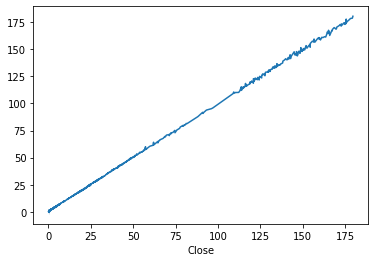

In [ ]:
sns.lineplot(data= grid,legend = 'auto', x= y_test , y= grid_preds )

In [ ]:
import pickle

In [ ]:
#filename = 'AAPL_Stock_Finalized_Model.sav'
pickle.dump(grid, open(r'C:\Users\Piyush\Desktop\ML_Learn\AAPL_Stock_Finalized_Model.sav', 'wb'))

In [ ]:
loaded_model = pickle.load(open(r'C:\Users\Piyush\Desktop\ML_Learn\AAPL_Stock_Finalized_Model.sav', 'rb'))
#result = loaded_model.score(scaled_X_test, y_test)